## Teórico:

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Vetor da SNR em dB (-10db a 45db)
vSNR = list(range(-10, 46, 1))

# Probabilidade de erro de símbolo (M-PAM)
def probErroPAM(v, m):
    Pe = []
    for i in v:
        SNR = np.power(10, i/10)
        erro = ((2 * m - 2) / m) * norm.sf(np.sqrt((6 / (np.power(m, 2) - 1)) * SNR))
        Pe.append(erro)
    return Pe         

# Probabilidade de erro de símbolo (M-QAM)
def probErroQAM(v, m):
    Pe = []
    for i in v:
        SNR = np.power(10, i/10)
        erro = (4 * (np.power(m, 2) - 1) / np.power(m, 2)) * norm.sf(np.sqrt(3 * SNR / (m - 1)))
        Pe.append(erro)
    return Pe

# Probabilidade de erro de símbolo (M-PSK)
def probErroPSK(v, m):
    Pe = []
    for i in v:
        SNR = np.power(10, i/10)
        erro = 2 * norm.sf(np.sqrt(2 * SNR) * np.sin(np.pi / m))
        Pe.append(erro)
    return Pe

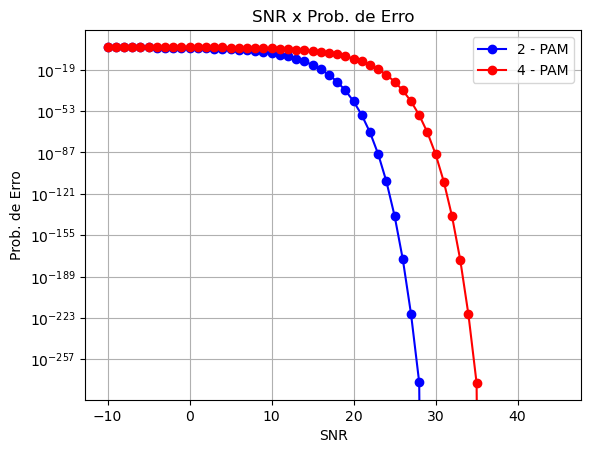

In [2]:
plt.semilogy(vSNR, probErroPAM(vSNR, 2), marker='o', color='b', label='2 - PAM')
plt.semilogy(vSNR, probErroPAM(vSNR, 4), marker='o', color='r', label='4 - PAM')
plt.xlabel('SNR')
plt.ylabel('Prob. de Erro')
plt.title('SNR x Prob. de Erro')
plt.legend()
plt.grid(True)
plt.show()

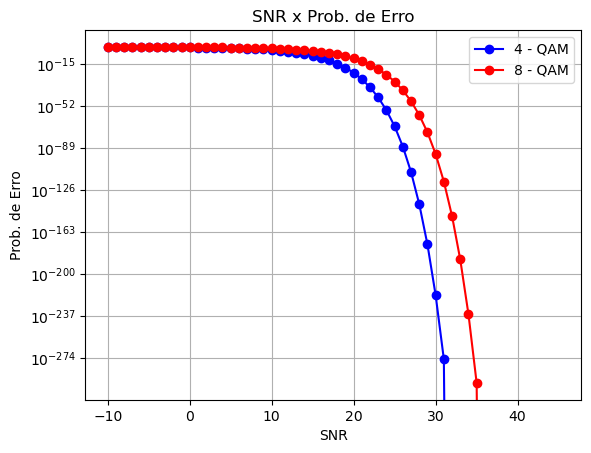

In [3]:
plt.semilogy(vSNR, probErroQAM(vSNR, 4), marker='o', color='b', label='4 - QAM')
plt.semilogy(vSNR, probErroQAM(vSNR, 8), marker='o', color='r', label='8 - QAM')
plt.xlabel('SNR')
plt.ylabel('Prob. de Erro')
plt.title('SNR x Prob. de Erro')
plt.legend()
plt.grid(True)
plt.show()

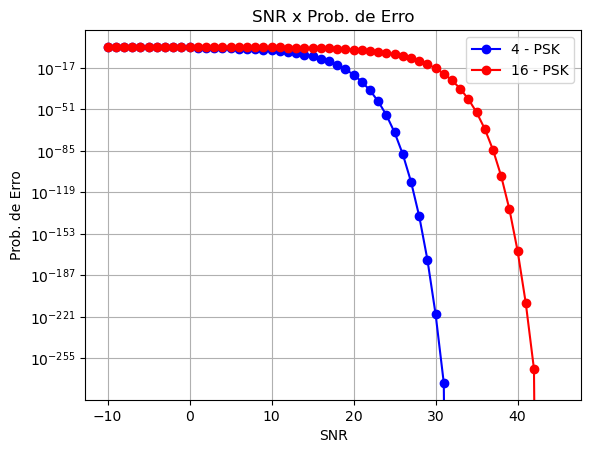

In [4]:
plt.semilogy(vSNR, probErroPSK(vSNR, 4), marker='o', color='b', label='4 - PSK')
plt.semilogy(vSNR, probErroPSK(vSNR, 16), marker='o', color='r', label='16 - PSK')
plt.xlabel('SNR')
plt.ylabel('Prob. de Erro')
plt.title('SNR x Prob. de Erro')
plt.legend()
plt.grid(True)
plt.show()

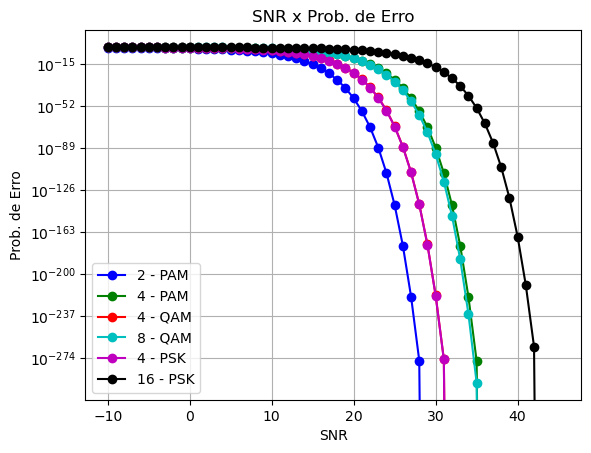

In [5]:
plt.semilogy(vSNR, probErroPAM(vSNR, 2), marker='o', color='b', label='2 - PAM')
plt.semilogy(vSNR, probErroPAM(vSNR, 4), marker='o', color='g', label='4 - PAM')
plt.semilogy(vSNR, probErroQAM(vSNR, 4), marker='o', color='r', label='4 - QAM')
plt.semilogy(vSNR, probErroQAM(vSNR, 8), marker='o', color='c', label='8 - QAM')
plt.semilogy(vSNR, probErroPSK(vSNR, 4), marker='o', color='m', label='4 - PSK')
plt.semilogy(vSNR, probErroPSK(vSNR, 16), marker='o', color='k', label='16 - PSK')
plt.xlabel('SNR')
plt.ylabel('Prob. de Erro')
plt.title('SNR x Prob. de Erro')
plt.legend()
plt.grid(True)
plt.show()

## Simulado:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def modulacao_2pam(sinal):
    simbolo_pam = []
    for i in sinal:
        if i == 0:
            simbolo_pam.append(-1)
        else:
            simbolo_pam.append(1)
    return simbolo_pam

def modulacao_4pam(sinal):
    simbolo_pam = []
    for i in range(0, len(sinal) - 1, 2):
        par = sinal[i:i+2]
        if all(par == [0,0]):
            simbolo_pam.append(-3)
        elif all(par == [0,1]):
            simbolo_pam.append(3)
        elif all(par == [1,0]):
            simbolo_pam.append(-1)
        else:
            simbolo_pam.append(1)
    return simbolo_pam

def modulacao_4psk(sinal):
    simbolo_pam = []
    for i in range(0, len(sinal) - 1, 2):
        par = sinal[i:i+2]
        if all(par == [0,0]):
            simbolo_pam.append(complex(0,-1))
        elif all(par == [0,1]):
            simbolo_pam.append(complex(-1,0))
        elif all(par == [1,0]):
            simbolo_pam.append(complex(1,0))
        else:
            simbolo_pam.append(complex(0,1))
    return simbolo_pam

#def modulacao_8psk(sinal):
#    simbolo_pam = []
#    for i in range(0, len(sinal) - 1, 3):
#        par = sinal[i:i+3]
#        if all(par == [0,0,0]):
#            simbolo_pam.append(complex(1,0))
#        elif all(par == [0,0,1]):
#            simbolo_pam.append(complex(0.7,0.7))
#        elif all(par == [0,1,1]):
#            simbolo_pam.append(complex(0,1))
#        elif all(par == [0,1,0]):
#            simbolo_pam.append(complex(-0.7,0.7))
#        elif all(par == [1,1,0]):
#            simbolo_pam.append(complex(-1,0))
#        elif all(par == [1,1,1]):
#            simbolo_pam.append(complex(-0.7,-0.7))
#        elif all(par == [1,0,1]):
#            simbolo_pam.append(complex(0,-1))
#        else:
#            simbolo_pam.append(complex(0.7,-0.7))
#    return simbolo_pam

def modulacao_8psk(sinal):
    simbolo_pam = []
    for i in range(0, len(sinal) - 2, 3):
        par = sinal[i:i+3]
        if np.array_equal(par, [0, 0, 0]):
            simbolo_pam.append(complex(1, 0))
        elif np.array_equal(par, [0, 0, 1]):
            simbolo_pam.append(complex(0.7, 0.7))
        elif np.array_equal(par, [0, 1, 1]):
            simbolo_pam.append(complex(0, 1))
        elif np.array_equal(par, [0, 1, 0]):
            simbolo_pam.append(complex(-0.7, 0.7))
        elif np.array_equal(par, [1, 1, 0]):
            simbolo_pam.append(complex(-1, 0))
        elif np.array_equal(par, [1, 1, 1]):
            simbolo_pam.append(complex(-0.7, -0.7))
        elif np.array_equal(par, [1, 0, 1]):
            simbolo_pam.append(complex(0, -1))
        else:
            simbolo_pam.append(complex(0.7, -0.7))
    return simbolo_pam

def modulacao_4qam(sinal):
    simbolo_pam = []
    for i in range(0, len(sinal) - 1, 2):
        par = sinal[i:i+2]
        if all(par == [0,0]):
            simbolo_pam.append(complex(-0.7,0.7))
        elif all(par == [0,1]):
            simbolo_pam.append(complex(0.7,0.7))
        elif all(par == [1,0]):
            simbolo_pam.append(complex(-0.7,-0.7))
        else:
            simbolo_pam.append(complex(0.7,-0.7))
    return simbolo_pam

def modulacao_16qam(sinal):
    simbolo_pam = []
    for i in range(0, len(sinal) - 1, 4):
        par = sinal[i:i+4]
        if all(par == [0,0,0,0]):
            simbolo_pam.append(complex(-1, 1))
        elif all(par == [0,0,0,1]):
            simbolo_pam.append(complex(-0.5, 1))
        elif all(par == [0,0,1,0]):
            simbolo_pam.append(complex(1, 1))
        elif all(par == [0,0,1,1]):
            simbolo_pam.append(complex(0.5, 1))
        elif all(par == [1,0,0,1]):
            simbolo_pam.append(complex(-0.5, 0.5))
        elif all(par == [1,0,0,0]):
            simbolo_pam.append(complex(-1,0.5))
        elif all(par == [1,0,1,1]):
            simbolo_pam.append(complex(0.5, 0.5))
        elif all(par == [1,0,1,0]):
            simbolo_pam.append(complex(1, 0.5))
        elif all(par == [1,1,1,1]):
            simbolo_pam.append(complex(0.5, -0.5))
        elif all(par == [1,1,1,0]):
            simbolo_pam.append(complex(1, -0.5))
        elif all(par == [1,1,0,1]):
            simbolo_pam.append(complex(-0.5,-0.5))
        elif all(par == [1,1,0,0]):
            simbolo_pam.append(complex(-1, -0.5))
        elif all(par == [0,1,1,1]):
            simbolo_pam.append(complex(0.5, -1))
        elif all(par == [0,1,0,1]):
            simbolo_pam.append(complex(-0.5, -1))
        elif all(par == [0,1,0,0]):
            simbolo_pam.append(complex(-1, -1))
        #0110
        else:
            simbolo_pam.append(complex(1,-1))
    return simbolo_pam

# Geração de bits e modulação:
sinal_binario = np.random.randint(0, 2, 6400)

simbolos_2pam = modulacao_2pam(sinal_binario)
simbolos_4pam = modulacao_4pam(sinal_binario)
simbolos_4psk = modulacao_4psk(sinal_binario)
simbolos_8psk = modulacao_8psk(sinal_binario)
simbolos_4qam = modulacao_4qam(sinal_binario)
simbolos_16qam = modulacao_16qam(sinal_binario)

2-PAM:


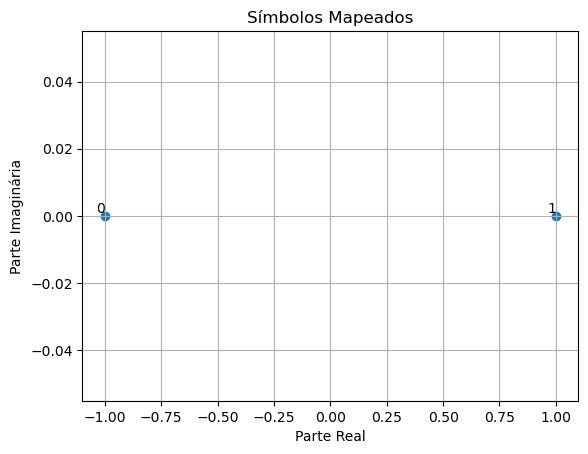

4-PAM:


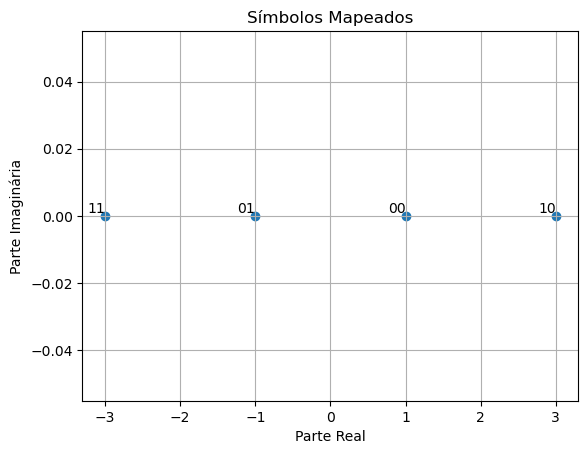

4-PSK:


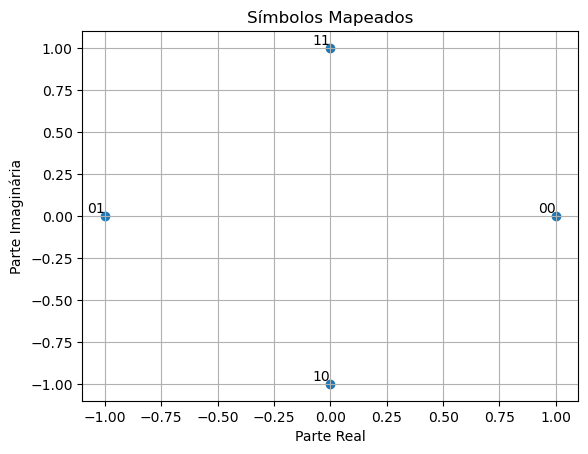

8-PSK:


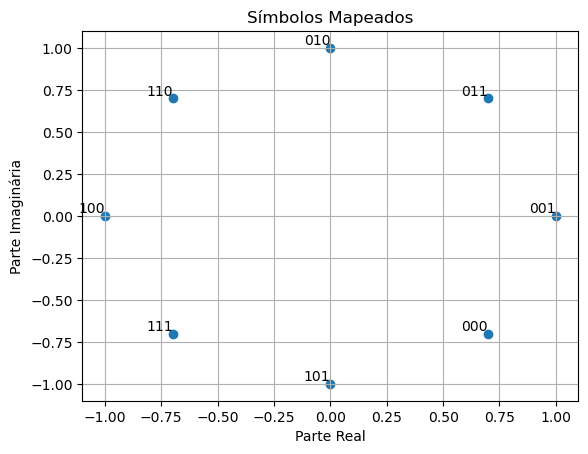

4-QAM:


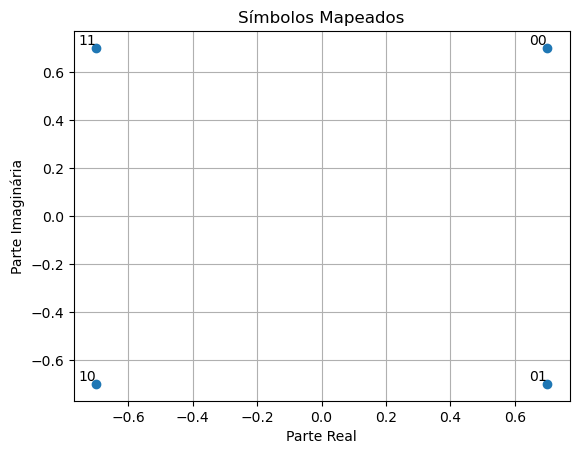

16-QAM:


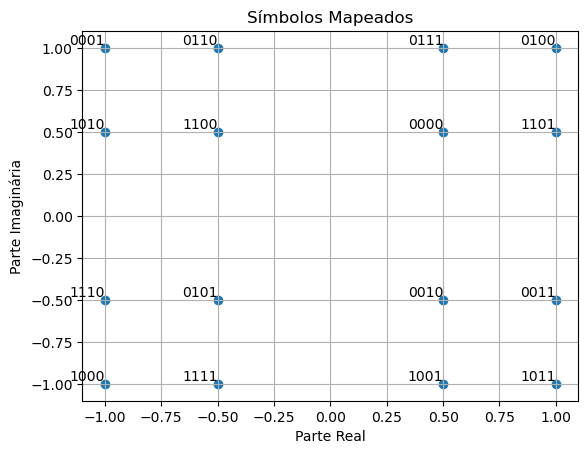

In [7]:
#Plot da Constelação:

gray2 = ['1', '0']
gray4 = ['00', '10', '11', '01']
gray8 = ['000', '001', '011', '010', '110', '111', '101', '100']
gray16 = ['0000', '0001', '0011', '0010', '0100', '0101', '0111', '0110', '1100', '1101', '1111', '1110', '1000', '1001', '1011', '1010']


def plotaConstelacao (simbolos, gray):
    parte_real = [s.real for s in simbolos]
    parte_imaginaria = [s.imag for s in simbolos]

    plt.scatter(parte_real, parte_imaginaria, marker='o')
    plt.title('Símbolos Mapeados')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')

    for i, (x, y) in enumerate(zip(parte_real, parte_imaginaria)):
        plt.text(x, y, f'{gray[i]}', fontsize=10, ha='right', va='bottom')

    plt.grid(True)
    plt.show()
    
print('2-PAM:')
plotaConstelacao(list(set(simbolos_2pam)), gray2)
print('4-PAM:')
plotaConstelacao(list(set(simbolos_4pam)), gray4)
print('4-PSK:')
plotaConstelacao(list(set(simbolos_4psk)), gray4)
print('8-PSK:')
plotaConstelacao(list(set(simbolos_8psk)), gray8)
print('4-QAM:')
plotaConstelacao(list(set(simbolos_4qam)), gray4)
print('16-QAM:')
plotaConstelacao(list(set(simbolos_16qam)), gray16)

In [8]:
#Adicionando Erro Gaussiano:

def addErroPAM(simbolos, snr_dB):
    snr = 10**(snr_dB / 10)
    ruido = np.random.normal(0, np.sqrt(1 / snr), len(simbolos))
    simbolos_ruidosos = simbolos + ruido    
    return simbolos_ruidosos

def addErroPSK(simbolos, snr_dB):
    snr = 10**(snr_dB / 10)
    ruido_fase = np.random.normal(0, np.sqrt(1 / (2 * snr)), len(simbolos))
    simbolos_ruidosos = simbolos * np.exp(1j * ruido_fase)    
    return simbolos_ruidosos

def addErroQAM(simbolos, snr_dB):
    snr = 10**(snr_dB / 10)
    ruido_real = 5 * np.random.normal(0, np.sqrt(1 / (2 * snr)), len(simbolos))
    ruido_imag = 5 * np.random.normal(0, np.sqrt(1 / (2 * snr)), len(simbolos))
    simbolos_ruidosos = simbolos + ruido_real + 1j * ruido_imag    
    return simbolos_ruidosos

#addErroPAM (simbolos_2pam, 30)
#addErroPSK (simbolos_4psk, 30)
#addErroPSK (simbolos_16qam, 30)

In [28]:
#Demodulação:

def demodulacao_2pam(simbolos_ruido):
    simbolos_decididos = [0 if s < 0 else 1 for s in simbolos_ruido]
    return simbolos_decididos


def demodulacao_4pam(simbolos):
    simbolos_original = []
    simbolos = np.array(simbolos, dtype=np.int32)
    for simbolo in simbolos:
        # -3
        if simbolo < -2:
            simbolos_original.extend([0, 0])
        # 3
        elif simbolo > 2:
            simbolos_original.extend([0, 1])
        # -1
        elif simbolo >= -2 & simbolo < 0:
            simbolos_original.extend([1, 0])
        # 1
        elif simbolo >= 0 & simbolo <= 2:
            simbolos_original.extend([1, 1])
    return np.array(simbolos_original)

def demodulacao_4psk(simbolos):
    bits_demodulados = []
    for simbolo in simbolos:
        fase = np.angle(simbolo, deg=True)
        if fase >= 225 and fase < 315:
            bits_demodulados.extend([0, 0])
        elif fase >= 135 and fase < 225:
            bits_demodulados.extend([0, 1])
        elif fase >= 315 and fase < 45:
            bits_demodulados.extend([1, 0])
        else:
            bits_demodulados.extend([1, 1])
    return bits_demodulados

#def demodulacao_8psk(simbolos):
#    bits_decididos = []
#    for simbolo in simbolos:
#        if np.isclose(simbolo, complex(1, 0)):
#            bits_decididos.extend([0, 0, 0])
#        elif np.isclose(simbolo, complex(0.7, 0.7)):
#            bits_decididos.extend([0, 0, 1])
#        elif np.isclose(simbolo, complex(0, 1)):
#            bits_decididos.extend([0, 1, 1])
#        elif np.isclose(simbolo, complex(-0.7, 0.7)):
#            bits_decididos.extend([0, 1, 0])
#        elif np.isclose(simbolo, complex(-1, 0)):
#            bits_decididos.extend([1, 1, 0])
#        elif np.isclose(simbolo, complex(-0.7, -0.7)):
#            bits_decididos.extend([1, 1, 1])
#        elif np.isclose(simbolo, complex(0, -1)):
#            bits_decididos.extend([1, 0, 1])
#        elif np.isclose(simbolo, complex(0.7, -0.7)):
#            bits_decididos.extend([1, 0, 0])
#        else:
#            bits_decididos.extend([9, 9, 9])
#    return np.array(bits_decididos)

def demodulacao_8psk(simbolos):
    bits_demodulados = []
    for simbolo in simbolos:
        fase = np.angle(simbolo, deg=True)
        if (fase >= -22.5 and fase < 22.5) or (fase >= 337.5):
            bits_demodulados.extend([0, 0, 0])
        elif fase >= 22.5 and fase < 67.5:
            bits_demodulados.extend([0, 0, 1])
        elif fase >= 67.5 and fase < 112.5:
            bits_demodulados.extend([0, 1, 1])
        elif fase >= 112.5 and fase < 157.5:
            bits_demodulados.extend([0, 1, 0])
        elif fase >= 157.5 and fase < 202.5:
            bits_demodulados.extend([1, 1, 0])
        elif fase >= 202.5 and fase < 247.5:
            bits_demodulados.extend([1, 1, 1])
        elif fase >= 247.5 and fase < 292.5:
            bits_demodulados.extend([1, 0, 1])
        elif fase >= 292.5 and fase < 337.5:
            bits_demodulados.extend([1, 0, 0])
        else:
            bits_demodulados.extend([0, 0, 0])
    return bits_demodulados

#def demodulacao_4qam(simbolos_ruidosos):
#    simbolos_decididos = []
#    for s in simbolos_ruidosos:
#        parte_real, parte_imaginaria = np.real(s), np.imag(s)
#        if parte_real < 0:
#            simbolos_decididos.append(0)
#        else:
#            simbolos_decididos.append(1)
#        if parte_imaginaria < 0:
#            simbolos_decididos.append(0)
#        else:
#            simbolos_decididos.append(1)
#    return simbolos_decididos

def demodulacao_4qam(simbolos):
    simbolos_original = []
    for s in simbolos:
        if s == complex(-0.7, 0.7):
            simbolos_original.extend([0, 0])
        elif s == complex(0.7, 0.7):
            simbolos_original.extend([0, 1])
        elif s == complex(-0.7, -0.7):
            simbolos_original.extend([1, 0])
        elif s == complex(0.7, -0.7):
            simbolos_original.extend([1, 1])
        else:
            simbolos_original.extend([0, 0])
    return np.array(simbolos_original)

def demodulacao_16qam(simbolos):
    simbolos_original = []
    for s in simbolos:
        if s == complex(-1, 1):
            simbolos_original.extend([0, 0, 0, 0])
        elif s == complex(-0.5, 1):
            simbolos_original.extend([0, 0, 0, 1])
        elif s == complex(1, 1):
            simbolos_original.extend([0, 0, 1, 0])
        elif s == complex(0.5, 1):
            simbolos_original.extend([0, 0, 1, 1])
        elif s == complex(-0.5, 0.5):
            simbolos_original.extend([1, 0, 0, 1])
        elif s == complex(-1, 0.5):
            simbolos_original.extend([1, 0, 0, 0])
        elif s == complex(0.5, 0.5):
            simbolos_original.extend([1, 0, 1, 1])
        elif s == complex(1, 0.5):
            simbolos_original.extend([1, 0, 1, 0])
        elif s == complex(0.5, -0.5):
            simbolos_original.extend([1, 1, 1, 1])
        elif s == complex(1, -0.5):
            simbolos_original.extend([1, 1, 1, 0])
        elif s == complex(-0.5, -0.5):
            simbolos_original.extend([1, 1, 0, 1])
        elif s == complex(-1, -0.5):
            simbolos_original.extend([1, 1, 0, 0])
        elif s == complex(0.5, -1):
            simbolos_original.extend([0, 1, 1, 1])
        elif s == complex(-0.5, -1):
            simbolos_original.extend([0, 1, 0, 1])
        elif s == complex(-1, -1):
            simbolos_original.extend([0, 1, 0, 0])
        else:
            simbolos_original.extend([0, 0, 1, 0])
    return simbolos_original

a = demodulacao_8psk(addErroPSK (simbolos_8psk, 30))
b = addErroPSK (simbolos_8psk, 30)

print(a)

[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
#Simulação de Monte Carlo:

def monte_carlo(snr_dB, num_simulacoes, tipo):
    erro_total = 0
    for _ in range(num_simulacoes):
        sinal = np.random.randint(0, 2, 7000)
        
        if tipo == '2-pam':
            simbolos_modulados = modulacao_2pam(sinal)
            simbolos_modulados_com_erro = addErroPAM(simbolos_modulados, snr_dB)
            simbolos_decididos = demodulacao_2pam(simbolos_modulados_com_erro)
        elif tipo == '4-pam':
            simbolos_modulados = modulacao_4pam(sinal)
            simbolos_modulados_com_erro = addErroPAM(simbolos_modulados, snr_dB)
            simbolos_decididos = demodulacao_4pam(simbolos_modulados_com_erro)
        elif tipo == '4-psk':
            simbolos_modulados = modulacao_4psk(sinal)
            simbolos_modulados_com_erro = addErroPSK(simbolos_modulados, snr_dB)
            simbolos_decididos = demodulacao_4psk(simbolos_modulados_com_erro)
        elif tipo == '8-psk':
            simbolos_modulados = modulacao_8psk(sinal)
            simbolos_modulados_com_erro = addErroPSK(simbolos_modulados, snr_dB)
            simbolos_decididos = demodulacao_8psk(simbolos_modulados_com_erro)
        elif tipo == '4-qam':
            simbolos_modulados = modulacao_4qam(sinal)
            simbolos_modulados_com_erro = addErroQAM(simbolos_modulados, snr_dB)
            simbolos_decididos = demodulacao_4qam(simbolos_modulados_com_erro)
        elif tipo == '16-qam':
            simbolos_modulados = modulacao_16qam(sinal)
            simbolos_modulados_com_erro = addErroQAM(simbolos_modulados, snr_dB)
            simbolos_decididos = demodulacao_16qam(simbolos_modulados_com_erro)
        
        erro_bits = np.sum(sinal != simbolos_decididos)
        erro_total += erro_bits
    
    taxa_erro_bit = erro_total / (num_simulacoes * 7000)
    return taxa_erro_bit

In [11]:
#Plot dos resultados da Simulação de Monte Carlo 

def pltMonteCarlo(tipos):
    vSNR = list(range(-10, 45, 1))
    for t in tipos:
        BER = []
        for snr in vSNR:
            aux = monte_carlo (snr, 100, t)
            BER.append(aux)
        plt.semilogy(vSNR, BER, marker='o', label=t.upper())

    plt.xlabel('SNR (dB)')
    plt.ylabel('Taxa de Erro de Bit')
    plt.title('Resultados: Simulação de Monte Carlo')
    plt.legend()
    plt.grid(True)
    plt.show()

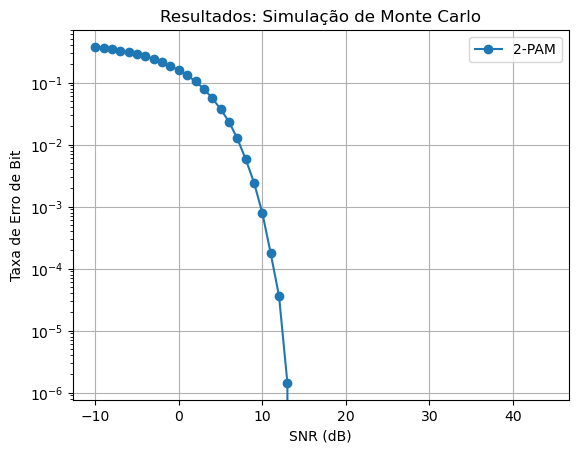

In [12]:
#tipos = ['2-pam', '4-pam', '4-psk', '8-psk', '4-qam', '16-qam']

#Erros: 8-psk, 4-qam, 16-qam;

tipos = ['2-pam']
pltMonteCarlo(tipos)

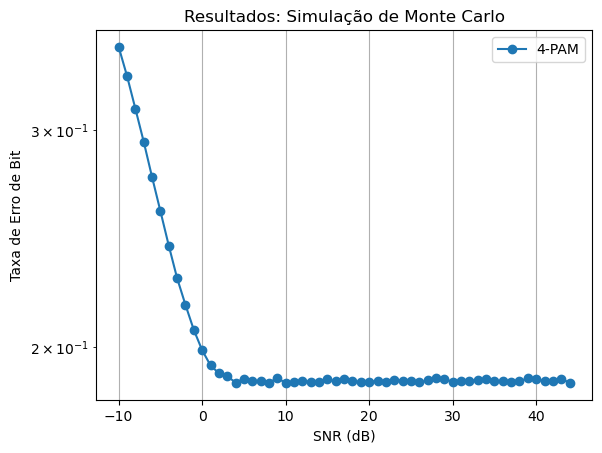

In [19]:
tipos = ['4-pam']
pltMonteCarlo(tipos)

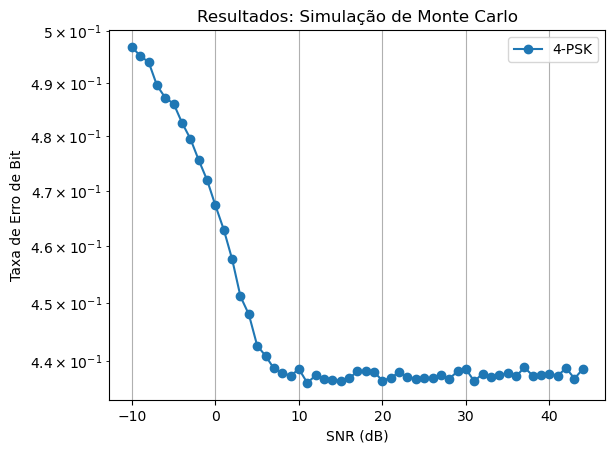

In [14]:
tipos = ['4-psk']
pltMonteCarlo(tipos)

C:\Users\joaov\AppData\Local\Temp\ipykernel_5524\550748962.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  erro_bits = np.sum(sinal != simbolos_decididos)


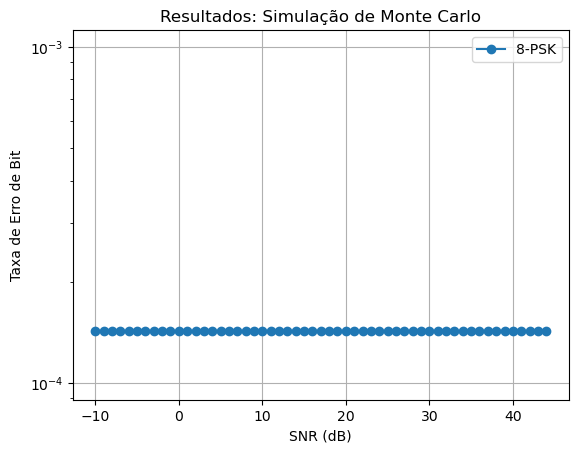

In [23]:
tipos = ['8-psk']
pltMonteCarlo(tipos)

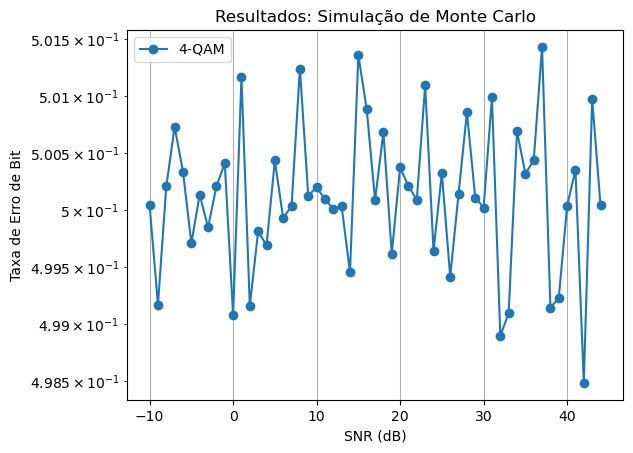

In [16]:
tipos = ['4-qam']
pltMonteCarlo(tipos)

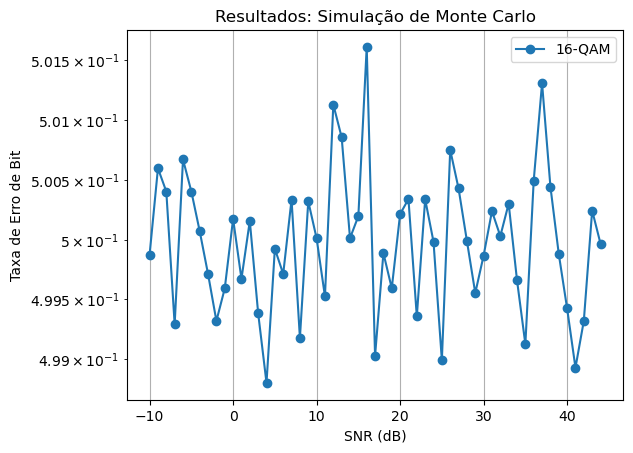

In [17]:
tipos = ['16-qam']
pltMonteCarlo(tipos)